web_trafficci.tsv saved


LinAlgError: SVD did not converge in Linear Least Squares

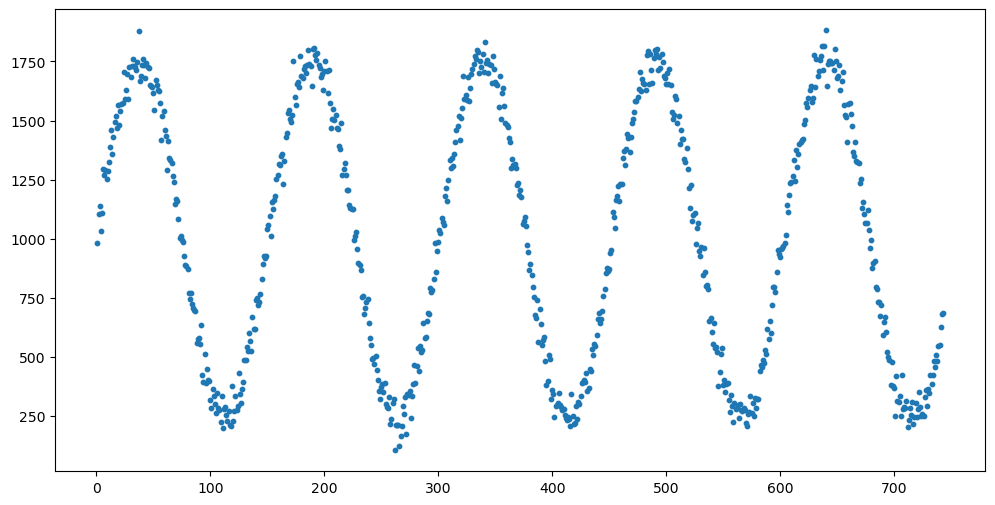

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def make_web_traffic_data():
    hours = np.arange(1, 744)
    
    # Generate web hits with added noise
    web_hits = 1000 + 750 * np.sin(hours / 24) + np.random.normal(0, 50, len(hours))
    
    data = np.column_stack((hours, web_hits))
    
    np.savetxt('web_trafficcc.tsv', data, delimiter='\t', header='hours\tweb_hits', comments='')

    print('web_trafficci.tsv saved')

make_web_traffic_data()

data = np.genfromtxt('web_trafficcc.tsv', delimiter='\t')
x = data[:, 0]
y = data[:, 1]

def plot_web_traffic(x, y):
    plt.figure(figsize=(12, 6))
    plt.scatter(x, y, s=10, label='Data')
    
    # Fit a polynomial curve of low degree to the data
    degree = 2  # Choose the degree of the polynomial curve
    coefficients = np.polyfit(x, y, degree)
    curve_x = np.linspace(x.min(), x.max(), 1000)
    curve_y = np.polyval(coefficients, curve_x)
    plt.plot(curve_x, curve_y, color='red', label='Curve Fit')
    
    plt.title("Web Traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks([w * 7 * 24 for w in range(5)], ['week %i' % (w + 1) for w in range(5)])
    plt.autoscale(tight=True)
    plt.grid()
    plt.legend()
    plt.savefig("web_trafficci.png")

plot_web_traffic(x, y)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def make_web_traffic_data():
    hours = np.arange(1, 744)
    
    # Generate web hits with added noise
    web_hits = 1000 + 750 * np.sin(hours / 24) + np.random.normal(0, 50, len(hours))
    
    data = np.column_stack((hours, web_hits))
    
    np.savetxt('web_trafficcc.tsv', data, delimiter='\t', header='hours\tweb_hits', comments='')

    print('web_trafficci.tsv saved')

make_web_traffic_data()

data = np.genfromtxt('web_trafficcc.tsv', delimiter='\t')
x = data[:, 0]
y = data[:, 1]

def plot_web_traffic(x, y):
    plt.figure(figsize=(12, 6))
    plt.scatter(x, y, s=10, label='Data')
    
    # Fit a polynomial curve of low degree to the data
    degree = 2  # Choose the degree of the polynomial curve
    coefficients = np.polyfit(x, y, degree)
    curve_x = np.linspace(x.min(), x.max(), 1000)
    curve_y = np.polyval(coefficients, curve_x)
    plt.plot(curve_x, curve_y, color='red', label='Curve Fit')
    
    plt.title("Web Traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks([w * 7 * 24 for w in range(5)], ['week %i' % (w + 1) for w in range(5)])
    plt.autoscale(tight=True)
    plt.grid()
    plt.legend()
    plt.savefig("web_trafficci.png")

plot_web_traffic(x, y)


[[      nan       nan]
 [1.000e+00 2.487e+03]
 [2.000e+00 2.362e+03]
 [3.000e+00 1.390e+03]
 [4.000e+00 1.712e+03]
 [5.000e+00 1.566e+03]
 [6.000e+00 1.430e+03]
 [7.000e+00 1.257e+03]
 [8.000e+00 1.439e+03]
 [9.000e+00 1.349e+03]]
Model parameters: [-1.34905175e-02  1.76636841e+03]
133047486.28357016


C:\Users\user\AppData\Local\Temp\ipykernel_1120\4175686554.py:51: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  mx = sp.linspace(0, x[-1], 1000)


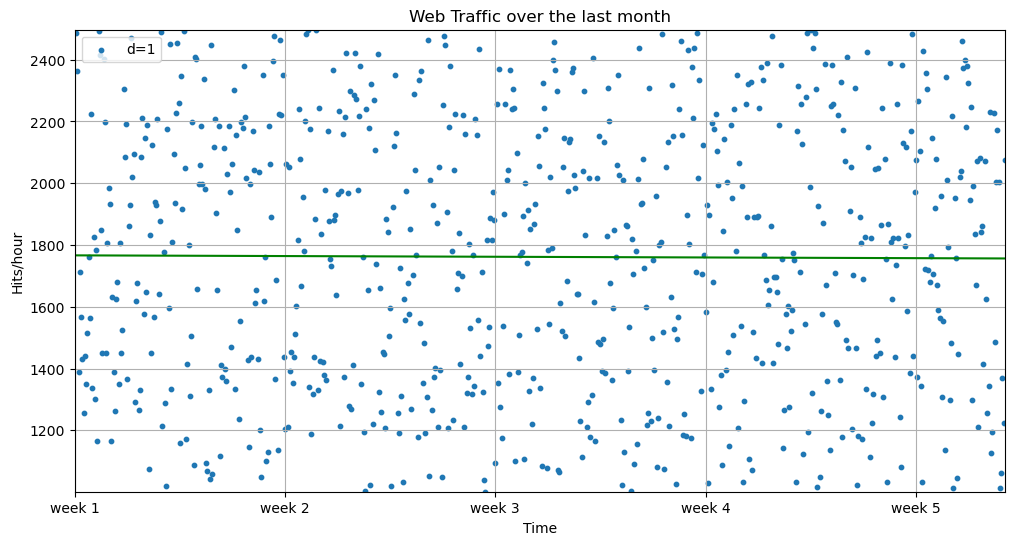

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random



def make_web_traffic_data():
    hours = np.arange(1, 744)
    web_hits = np.random.randint(1000, 2000, 743)

    gull = web_hits[np.random.choice(hours, size=20, replace=False)]
    gull = float(np.nan)

    data = np.column_stack((hours, web_hits))

    np.savetxt('web_trafficcc.tsv', data, delimiter='\t', header='hours\tweb_hits', comments='')

    print('web_trafficci.tsv saved')


data = np.genfromtxt(r"C:\Users\user\PycharmProjects\helloworld\pythonProject\studybud\algorithms\web_trafficcc.tsv", delimiter="\t")
print(data[:10])

x = data[:, 0]
y = data[:, 1]
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

if (y > 2599).any() and (y>1200):
    y = np.nan


def plot_web_traffic(x, y, models=None):
    """
    plot the web traffic (y) over time (x)
    if models is given, it is expected to be a list of fitted models,
    which will be plotted as well (used later in this chapter).
    """
    plt.figure(figsize=(12, 6))  # width and height of the plot in inches
    plt.scatter(x, y, s=10)
    plt.title("Web Traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks([w * 7 * 24 for w in range(5)],
               ['week %i' % (w + 1) for w in range(5)])
    if models:
        colors = ['g', 'k', 'b', 'm', 'r']
        linestyles = ['-', '-.', '--', ':', '-']

        mx = sp.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            plt.plot(mx, model(mx), linestyle=style, color=color)
        plt.legend(["d=%i" % m.order for m in models], loc="upper left")
    plt.autoscale(tight=True)
    plt.grid()
    plt.savefig("web_trafficci.png")


def error(f, x, y):
    return np.sum((f(x) - y) ** 2)


fp1 = np.polyfit(x, y, 1)
print("Model parameters: %s" % fp1)

f1 = np.poly1d(fp1)
print(error(f1, x, y))

plot_web_traffic(x,y,[f1])

